# Bước 1: Import thư viện

In [1]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Bước 2: Đọc dữ liệu

In [2]:
# đọc dữ liệu từ file csv
df = pd.read_csv('Dữ liệu Lịch sử VNM 2013_2023.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
1     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
2     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
3     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
4     17/07/2023  72,300.0  73,000.0  73,600.0  72,200.0
...          ...       ...       ...       ...       ...
2500  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2501  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2502  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2503  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2504  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2505 rows x 5 columns]


# Bước 3: Mô tả dữ liệu

In [3]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [4]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [5]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [6]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [7]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


In [8]:
# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())

Ngày         0
Đóng cửa     0
Mở cửa       0
Cao nhất     0
Thấp nhất    0
dtype: int64


# Bước 4: Tiền xử lý dữ liệu

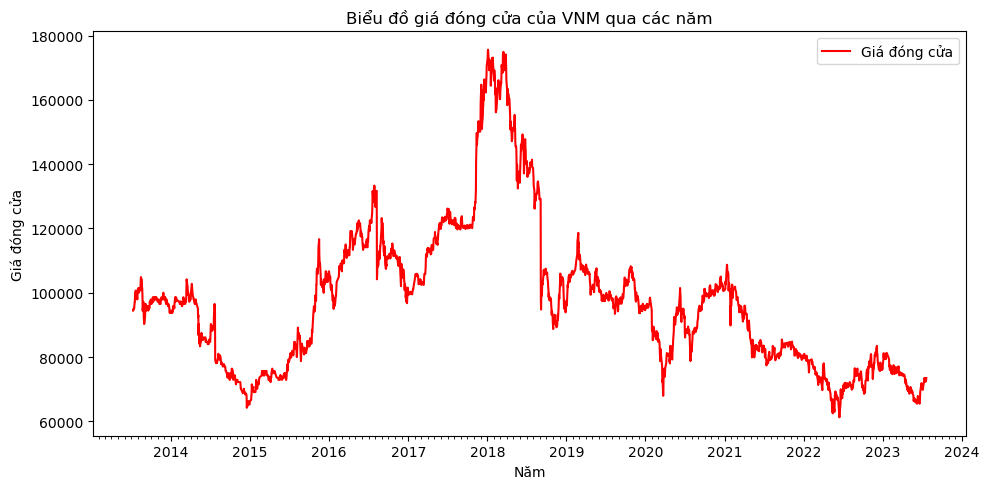

In [9]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


<Axes: xlabel='Đóng cửa'>

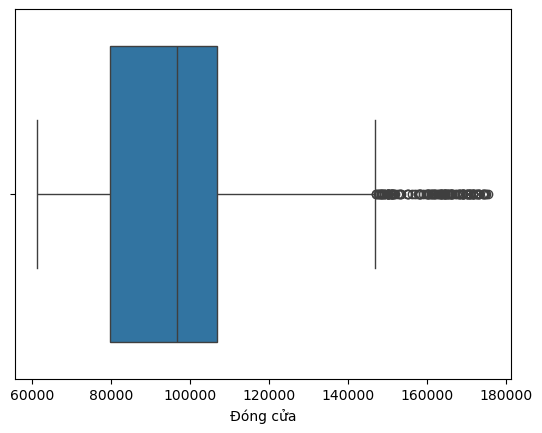

In [10]:
import seaborn as sns
sns.boxplot(x=df['Đóng cửa'])

Biểu đồ trên cho thấy có 1 số lượng lớn giá trị ngoại lai


**Xử lý các giá trị ngoại lai**

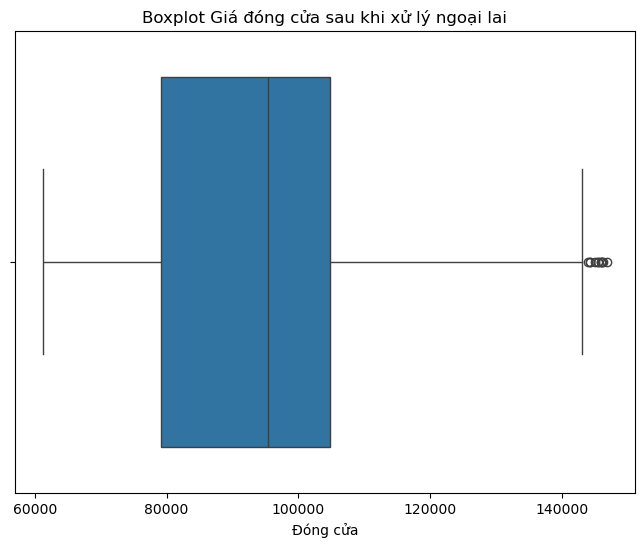

Số lượng dữ liệu ban đầu: 2505
Số lượng dữ liệu sau khi xử lý ngoại lai: 2382


In [11]:
# Sử dụng IQR để xác định và loại bỏ giá trị ngoại lai
Q1 = df['Đóng cửa'].quantile(0.25)
Q3 = df['Đóng cửa'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Đóng cửa'] >= lower_bound) & (df['Đóng cửa'] <= upper_bound)]

# Vẽ lại biểu đồ boxplot sau khi xử lý giá trị ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Đóng cửa'])
plt.title('Boxplot Giá đóng cửa sau khi xử lý ngoại lai')
plt.show()

# In ra số lượng dữ liệu trước và sau khi xử lý ngoại lai
print(f"Số lượng dữ liệu ban đầu: {len(df)}")
print(f"Số lượng dữ liệu sau khi xử lý ngoại lai: {len(df_no_outliers)}")


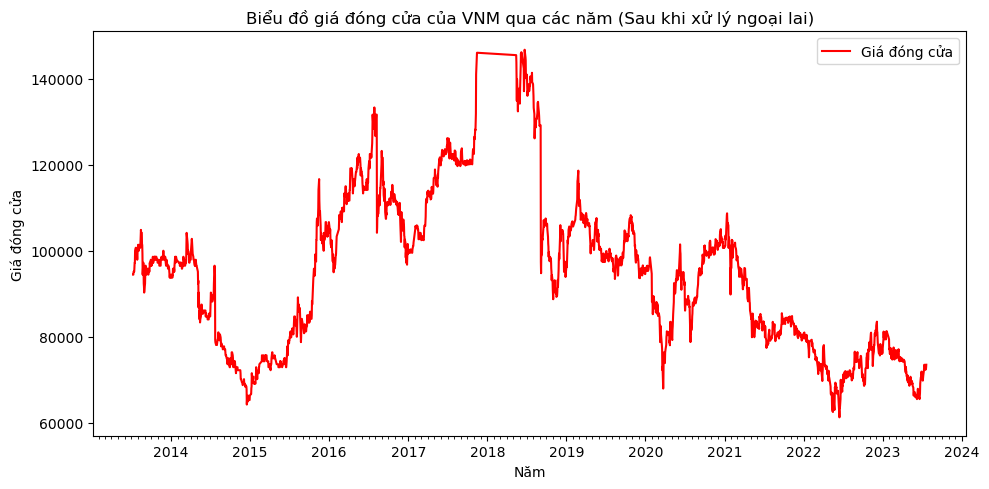

In [12]:
# biểu đồ giá đóng cửa qua các năm sau khi đã xử lý các giá trị ngoại lai

# Tạo đồ thị giá đóng cửa qua các năm sau khi xử lý ngoại lai
plt.figure(figsize=(10, 5))
plt.plot(df_no_outliers['Ngày'], df_no_outliers['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm (Sau khi xử lý ngoại lai)')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


In [13]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-17,72300.0
2023-07-18,72400.0
2023-07-19,72600.0


In [14]:
# Tạo các đường trung bình để nắm bắt xu hướng
df1['MA_5'] = df1['Đóng cửa'].rolling(window=5).mean()
df1['MA_10'] = df1['Đóng cửa'].rolling(window=10).mean()
df1['MA_20'] = df1['Đóng cửa'].rolling(window=20).mean()
df1['MA_60'] = df1['Đóng cửa'].rolling(window=60).mean()
df1['MA_120'] = df1['Đóng cửa'].rolling(window=120).mean()

In [15]:
# Tạo một cột tính phần trăm thay đổi giá cổ phiếu giữa các ngày
df1['Price_Change'] = df1['Đóng cửa'].pct_change()

In [16]:
# Dùng kĩ thuật RSI để cải thiện độ chính xác
def RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df1['RSI'] = RSI(df1['Đóng cửa'], period=14)


In [17]:
# Xử lý các dữ liệu bị thiếu (vì khi sau khi tạo các đặc trưng mới, có thể xuất hiện dữ liệu bị thiếu (NaN))
df1.fillna(method='bfill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía sau
df1.fillna(method='ffill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía trước

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5012\3310697010.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía sau
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5012\3310697010.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía trước


In [18]:
# Chia tập dữ liệu (80% huấn luyện, 20% kiểm thử)
train_size = int(len(df1) * 0.8)
train_data, test_data = df1[:train_size], df1[train_size:]

In [19]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Bước 5: Xây dựng và huấn luyện mô hình

In [20]:
# Tạo tập huấn luyện theo cửa sổ thời gian (Sliding Window)
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 5  # Số ngày sử dụng để dự đoán
X_train, y_train = create_dataset(train_scaled[:, 0], window_size)
X_test, y_test = create_dataset(test_scaled[:, 0], window_size)


In [21]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

In [22]:
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.006880466471094503
Mean Squared Error: 8.696793275104954e-05
R-squared: 0.9624904157004097


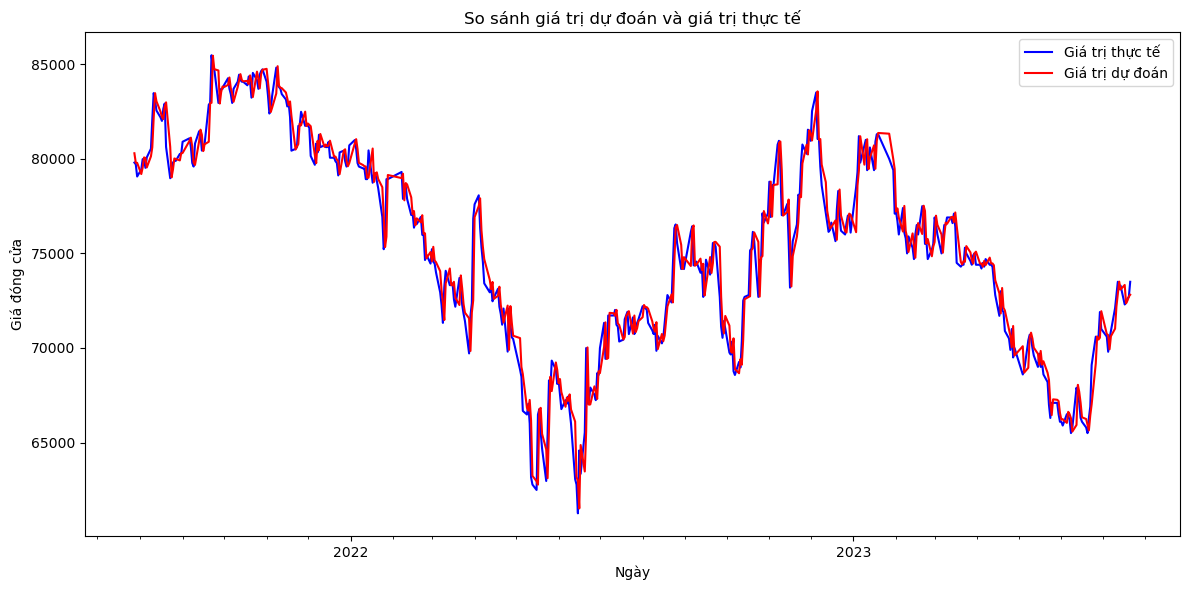

In [23]:
# prompt: từ những gì đã làm được ở trên hãy vẽ biểu biểu đồ so sánh giữa giá trị dự đoán và giá trị thực tế để quan sát hiệu suất mô hình theo định dạng của các biểu đồ ở trên

# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original, label='Giá trị dự đoán', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

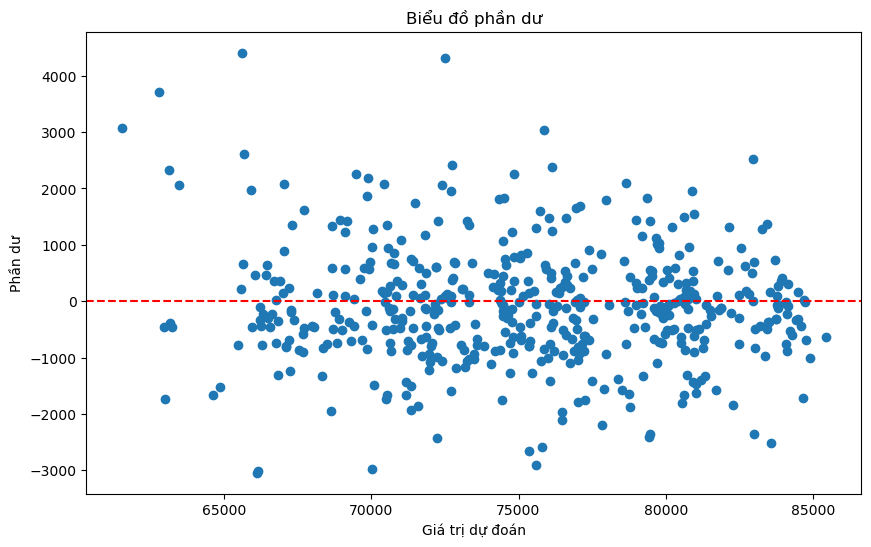

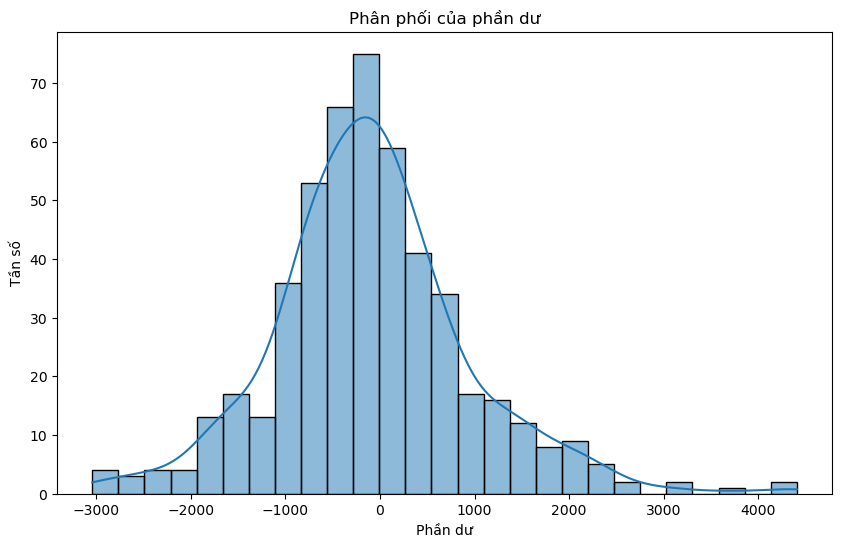

In [24]:
# prompt: tạo tương tự với biểu đồ phần dư

# Tính phần dư (residuals)
residuals = y_test_original - y_pred_original

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.title('Biểu đồ phần dư')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Phần dư')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư')
plt.show()


**Kết luận đưa ra từ biểu đồ phần dư:**



**Rigde**

In [25]:


# Tạo mô hình Ridge
ridge_model = Ridge(alpha=1.0)  # alpha là tham số điều chỉnh độ mạnh của regularisation

# Huấn luyện mô hình
ridge_model.fit(X_train, y_train)

# Dự đoán
y_pred_ridge = ridge_model.predict(X_test)

# Đánh giá mô hình
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Absolute Error (Ridge): {mae_ridge}")
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")




Mean Absolute Error (Ridge): 0.008093843983432871
Mean Squared Error (Ridge): 0.00011311459716999134
R-squared (Ridge): 0.9512132646614994


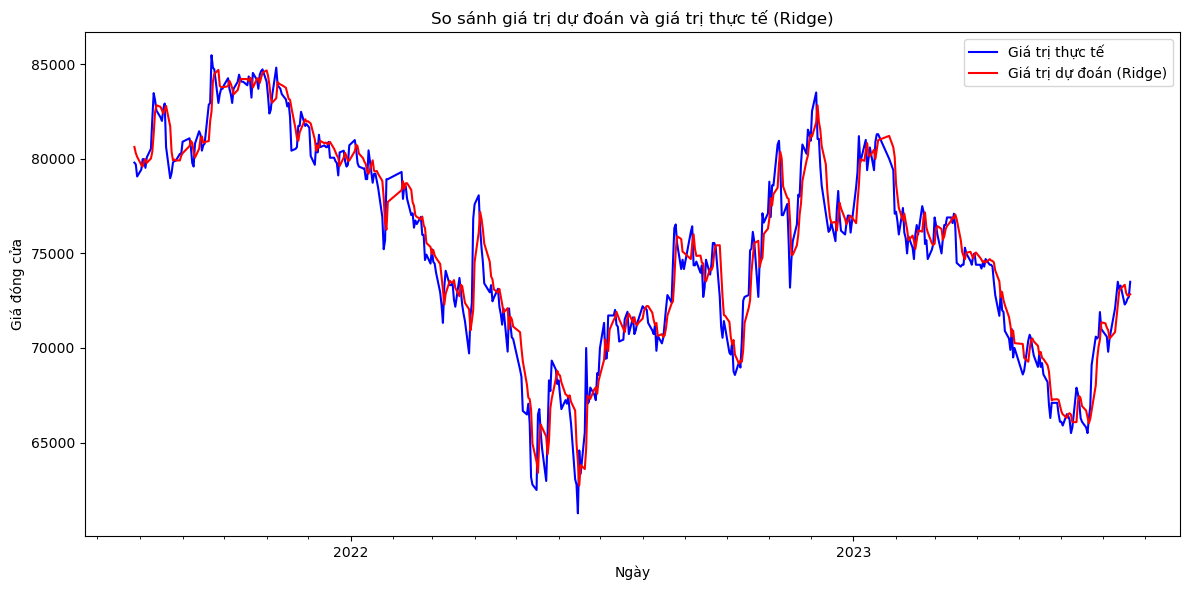

In [26]:
# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original_ridge = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original_ridge = scaler.inverse_transform(np.concatenate((y_pred_ridge.reshape(-1, 1), np.zeros((len(y_pred_ridge),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original_ridge, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original_ridge, label='Giá trị dự đoán (Ridge)', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế (Ridge)')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

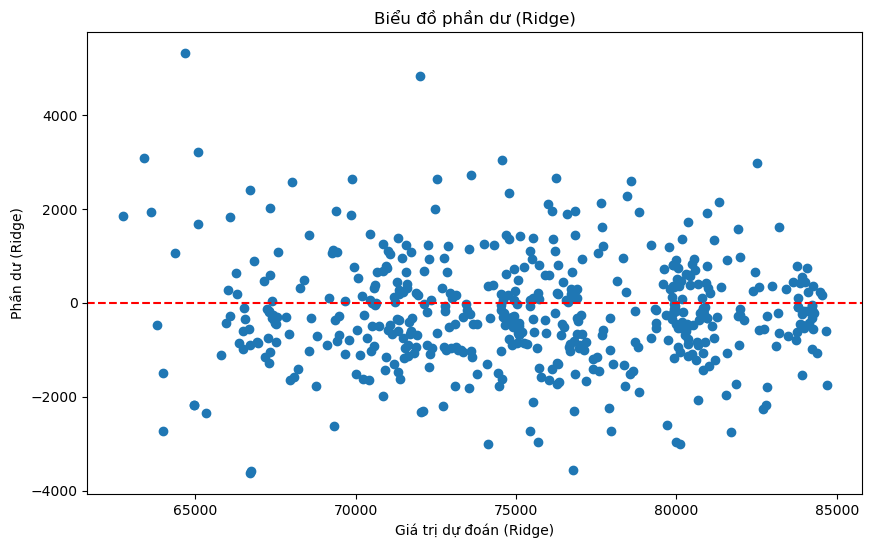

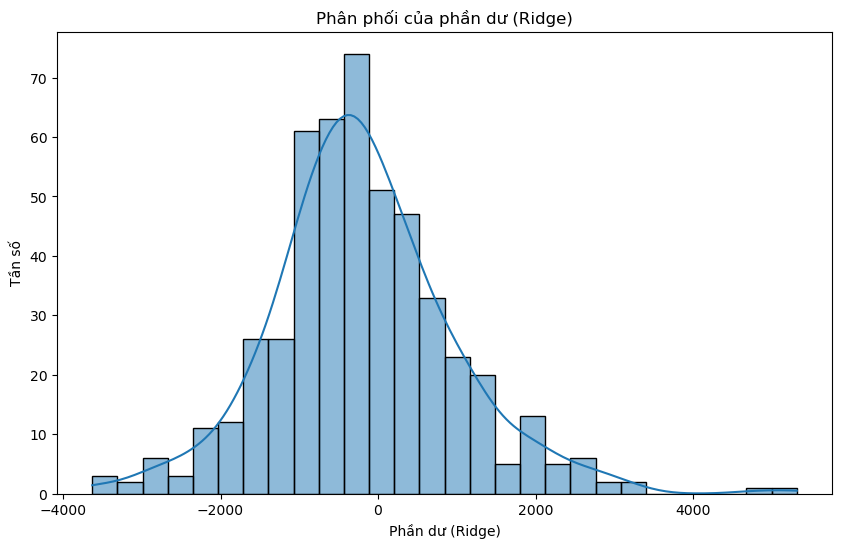

In [27]:
# Tính phần dư (residuals)
residuals_ridge = y_test_original_ridge - y_pred_original_ridge

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original_ridge, residuals_ridge)
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán (Ridge)')
plt.ylabel('Phần dư (Ridge)')
plt.title('Biểu đồ phần dư (Ridge)')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, kde=True)
plt.xlabel('Phần dư (Ridge)')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư (Ridge)')
plt.show()

**Neural Network**

In [28]:


# Tạo mô hình Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Huấn luyện mô hình
mlp_model.fit(X_train, y_train)

# Dự đoán
y_pred_mlp = mlp_model.predict(X_test)

# Đánh giá mô hình
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Mean Absolute Error (Neural Network): {mae_mlp}")
print(f"Mean Squared Error (Neural Network): {mse_mlp}")
print(f"R-squared (Neural Network): {r2_mlp}")

Mean Absolute Error (Neural Network): 0.010265342666277464
Mean Squared Error (Neural Network): 0.0001843130728896796
R-squared (Neural Network): 0.9205051042795022


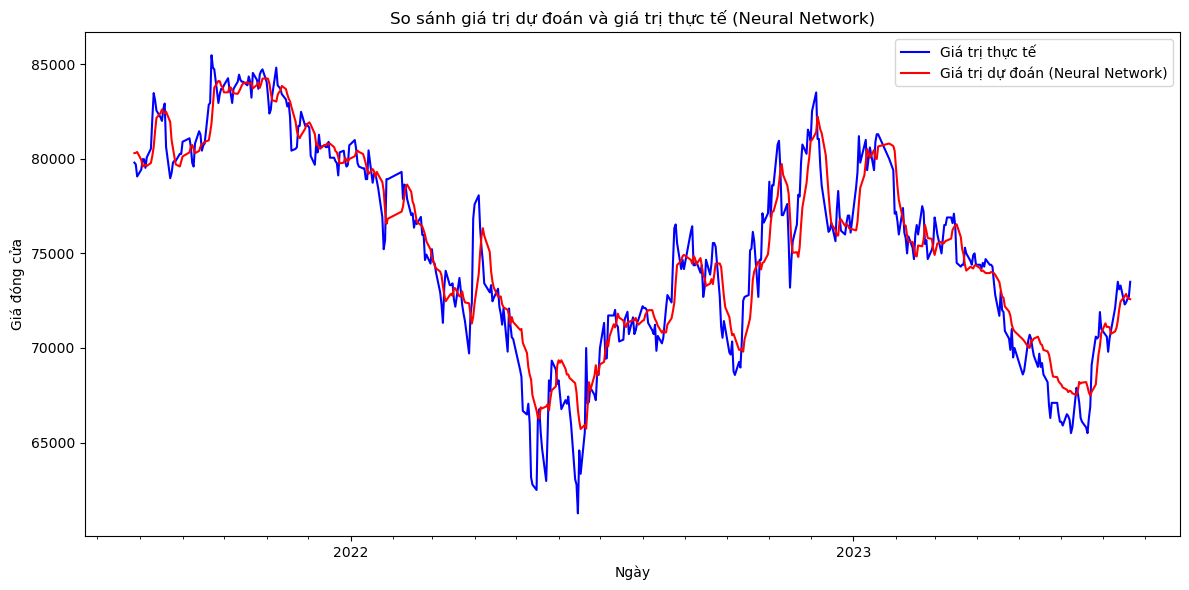

In [29]:
# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original_mlp = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original_mlp = scaler.inverse_transform(np.concatenate((y_pred_mlp.reshape(-1, 1), np.zeros((len(y_pred_mlp),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original_mlp, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original_mlp, label='Giá trị dự đoán (Neural Network)', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế (Neural Network)')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

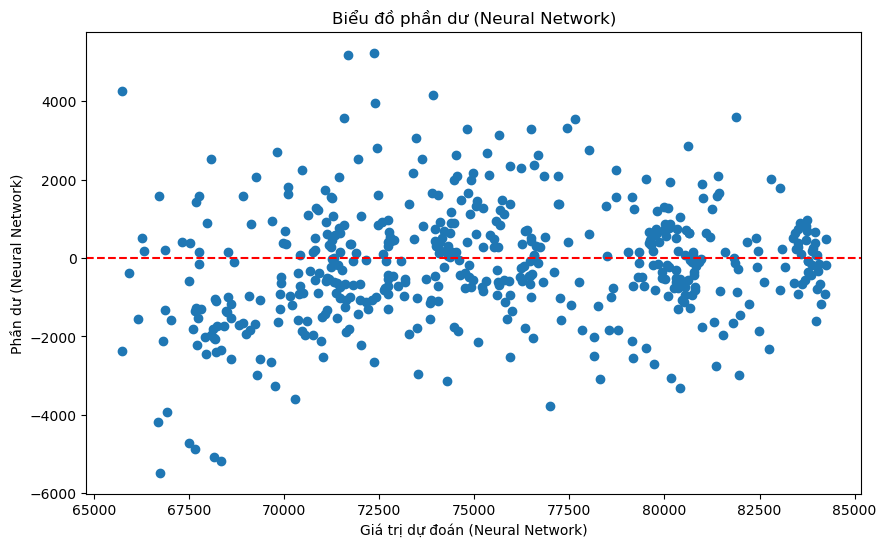

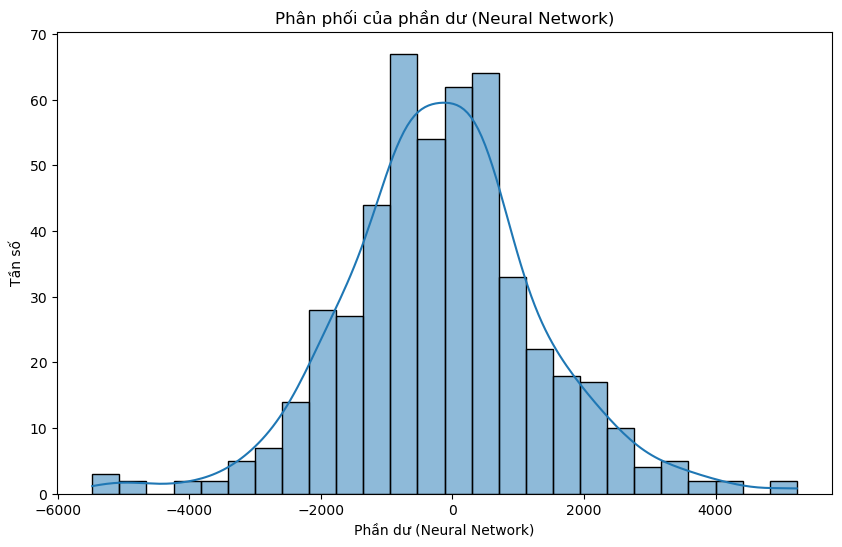

In [30]:
# Tính phần dư (residuals)
residuals_mlp = y_test_original_mlp - y_pred_original_mlp

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original_mlp, residuals_mlp)
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán (Neural Network)')
plt.ylabel('Phần dư (Neural Network)')
plt.title('Biểu đồ phần dư (Neural Network)')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals_mlp, kde=True)
plt.xlabel('Phần dư (Neural Network)')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư (Neural Network)')
plt.show()